In [88]:
#use following for training and testing of tfidf and word2vec
#tfidf 
#X_train=train_tfidf
#X_test=test_tfidf
#y_train=training_data['toxic']
#y_test=test['toxic']


#word2vec train
#X_train=wordvec_train
#X_test=wordvec_test
#y_train=training_data['toxic']
#y_test=test['toxic']
!pip install tensorflow

You should consider upgrading via the 'c:\users\sathwik\anaconda3\python.exe -m pip install --upgrade pip' command.


In [89]:

import numpy as np
import pandas as pd
import re
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten,LSTM
from keras.models import Sequential
from tensorflow.keras import layers
%matplotlib inline

In [90]:
df1=pd.read_csv('trac2_eng_train.csv')

In [91]:
df2=pd.read_csv('toxic_train.csv')

In [92]:
test2=pd.read_csv('toxic_test.csv')

In [93]:
test1=pd.read_csv('trac2_eng_dev.csv')

In [94]:
df1.head()

,ID,Text,Sub-task A,Sub-task B
0,C45.451,Next part,NAG,NGEN
1,C47.11,Iii8mllllllm\nMdxfvb8o90lplppi0005,NAG,NGEN
2,C33.79,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,NAG,NGEN
3,C4.1961,What the fuck was this? I respect shwetabh and...,NAG,NGEN
4,C10.153,Concerned authorities should bring arundathi R...,NAG,NGEN


In [95]:
df2.head()

,Unnamed: 0,comment_text,toxic
0,0,Explanation\r\nWhy the edits made under my use...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\r\nMore\r\nI can't make any real suggestions...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [96]:
df1.drop('ID',axis=1,inplace=True)

In [97]:
df1['Sub-task A']=df1['Sub-task A'].map({'NAG':0,'CAG':1,'OAG':1})
test1['Sub-task A']=test1['Sub-task A'].map({'NAG':0,'CAG':1,'OAG':1})

In [98]:
test1['Sub-task B']=test1['Sub-task B'].map({'NGEN':0,'GEN':1})
test1['Sub-task B']=test1['Sub-task B'].map({'NGEN':0,'GEN':1})

In [99]:
df1['toxic']=np.logical_or(df1['Sub-task A'],df1['Sub-task B']).map({True:1,False:0})
test1['toxic']=np.logical_or(test1['Sub-task A'],test1['Sub-task B']).map({True:1,False:0})

In [100]:
df1.drop(['Sub-task A','Sub-task B'],axis=1,inplace=True)

In [101]:
df2.drop('Unnamed: 0',axis=1,inplace=True)
test2.drop('Unnamed: 0',axis=1,inplace=True)

In [102]:
df2.rename(columns={'comment_text': 'Text', 'toxic': 'toxic'}, inplace=True)
test2.rename(columns={'comment_text': 'Text', 'toxic': 'toxic'}, inplace=True)

In [103]:
training_data=shuffle(pd.concat([df1,df2],axis=0,join='outer'))

In [104]:
training_data['toxic'].value_counts()

0.0    144277
1.0     16182
Name: toxic, dtype: int64

In [105]:
training_data_pos=training_data[training_data['toxic']==1]

In [106]:
from sklearn.utils import shuffle
training_data_neg=shuffle(training_data[training_data['toxic']==0])[:20000]

In [107]:
training_data=shuffle(pd.concat([training_data_pos,training_data_neg]))

In [108]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F950"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

training_data['Text']=training_data['Text'].apply(remove_emoji)
test1['Text']=test1['Text'].apply(remove_emoji)
test2['Text']=test2['Text'].apply(remove_emoji)

In [109]:
training_data.head()

,Text,toxic
71054,"""\r\nThere you go again. """"Blunder"""" is not a ...",0.0
56287,I still don't understand why I was blocked wh...,0.0
55308,"back off\r\ndon't delete my question, bitch",1.0
128074,Israeli looser \r\nIt is very pleasant to see ...,1.0
3596,"I'm sorry\r\nDear Friday, I have noticed you h...",0.0


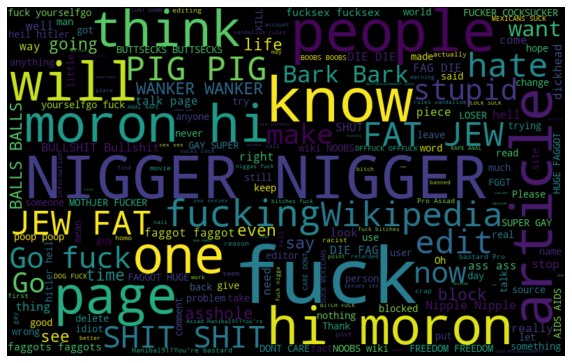

In [110]:
all_words = ' '.join([text for text in training_data[training_data['toxic']==1]['Text']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [111]:
test1.drop(['ID','Sub-task A','Sub-task B'],axis=1,inplace=True)
test=pd.concat([test1,test2],axis=0)
test_1=test[test['toxic']==1]
test2=shuffle(test[test['toxic']==0])[:2000]
test=shuffle(pd.concat([test1,test2],axis=0))

In [112]:
training_data['Text']

71054     "\r\nThere you go again. ""Blunder"" is not a ...
56287     I still don't understand why I was blocked  wh...
55308           back off\r\ndon't delete my question, bitch
128074    Israeli looser \r\nIt is very pleasant to see ...
3596      I'm sorry\r\nDear Friday, I have noticed you h...
                                ...                        
43193     I think I understood from EdJohnston that I co...
13705     HOCKEY STICK UP YOUR ASS \r\n\r\nHOW DARE YOU ...
22601     Message for an old, white, asian rooter. \r\n\...
10844     Home Timber and Hardware \r\n\r\nWhat now Bidg...
115814    Holy shit, you people suck. I don't see any wa...
Name: Text, Length: 36182, dtype: object

In [113]:
tex=training_data['Text'][13705]
tex

"HOCKEY STICK UP YOUR ASS \r\n\r\nHOW DARE YOU ACCUSE THE AUTHOR OF THE ERIC GOERTZ ARTICLE OF WANTING WORLDWIDE FAME? Fucking asshole.\r\n\r\nI wish there was still a hockey strike you FUCKHEAD.\r\n\r\nGo ahead try to get my shit deleted wikipedia is just a bunch of old fucks trying to act scholarly about matters they know nothing about, how the fuck would you have heard this story any other way except by me using wikipedia? That's what I thought.\r\n\r\nI hope you don't get palsy sitting on your computer salivating over women's NHL photos all day.\r\n\r\nGo ahead and make my day!"

In [114]:
def remove_escapes(tex):
    escapes = ''.join([chr(char) for char in range(1, 32)])
    translator = str.maketrans('', '', escapes)
    t = tex.translate(translator)
    return t
print(remove_escapes(tex))

HOCKEY STICK UP YOUR ASS HOW DARE YOU ACCUSE THE AUTHOR OF THE ERIC GOERTZ ARTICLE OF WANTING WORLDWIDE FAME? Fucking asshole.I wish there was still a hockey strike you FUCKHEAD.Go ahead try to get my shit deleted wikipedia is just a bunch of old fucks trying to act scholarly about matters they know nothing about, how the fuck would you have heard this story any other way except by me using wikipedia? That's what I thought.I hope you don't get palsy sitting on your computer salivating over women's NHL photos all day.Go ahead and make my day!


In [66]:
ps=PorterStemmer()
def remove_punctuation_and_stopwords(s): 
    s=remove_escapes(s)
    l = nltk.word_tokenize(s)
    l = [x for x in l if not re.fullmatch('[' + string.punctuation + ']+', x)]
    l=  [word for word in l if word not in stopwords.words('english')]
    l=  [ps.stem(i) for i in l]
    return l



In [115]:
print(remove_punctuation_and_stopwords("i am doing work with\n\r the help of classmate"))

['work', 'help', 'classmat']


In [116]:
# training_data['Text']=training_data['Text'].apply(remove_punctuation_and_stopwords)
# training_data['Text']

In [71]:
test['Text']=test['Text'].apply(remove_punctuation_and_stopwords)

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

In [118]:
bow_transformer = CountVectorizer(analyzer=remove_punctuation_and_stopwords).fit(training_data['Text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

82129


In [119]:
training_bow = bow_transformer.transform(training_data['Text'])

In [120]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(training_bow)

In [122]:
training_tfidf = tfidf_transformer.transform(training_bow)
print(training_tfidf.shape)

(36182, 82129)


In [123]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(training_tfidf,training_data['toxic'])

In [142]:
all_predictions=spam_detect_model.predict(training_tfidf)
all_predictions

array([0., 0., 1., ..., 0., 0., 1.])

In [143]:
test['Text']

9853     " \r\n ::Thanks. Hope that ""history merge"" p...
734                                       @Mokul Rai Hello
56581    'BCE' and 'CE'== \r\n\r\n Let's stop this stup...
369      yes buddy i agree you are so clear thats good ...
794                                     Nice t shirt ..sir
                               ...                        
85       Shwetabh bhai.. you are an eye opener for yout...
16609    " \r\n ***I'm with Brian0918. This article is ...
31278    "{| class=""messagebox standard-talk"" style="...
15967    "*You sign as ""bathrobe"" does that really co...
839      bhai i am a bengali, i understand some hindi.....
Name: Text, Length: 3066, dtype: object

In [144]:
testing_bow=bow_transformer.transform(test['Text'])

In [129]:
testing_tfidf = tfidf_transformer.transform(training_bow)

In [131]:
test['toxic']

9853     0
734      1
56581    0
369      1
794      1
        ..
85       1
16609    0
31278    0
15967    0
839      1
Name: toxic, Length: 3066, dtype: int64

In [140]:
test_predictions=spam_detect_model.predict(testing_tfidf)
test_predictions

array([0., 0., 1., ..., 0., 0., 1.])

In [141]:
from sklearn.metrics import classification_report
print (classification_report(test['toxic'],test_predictions))

ValueError: Found input variables with inconsistent numbers of samples: [3066, 36182]

# Tf-Idf

In [72]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
l=[]
for i in training_data['Text']:
    l.append(''.join(j+' ' for j in i ))
train_tfidf = tfidf_vectorizer.fit_transform(l).toarray()
l=[]
for i in test['Text']:
    l.append(''.join(j+' ' for j in i ))
test_tfidf = tfidf_vectorizer.transform(l).toarray()

# Word2Vec

In [73]:
import gensim
model_w2v = gensim.models.Word2Vec(
            training_data['Text'],
            vector_size=200,
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(training_data['Text'], total_examples= len(training_data['Text']), epochs=20)

C:\Users\Sathwik\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


(23504684, 26812260)

In [81]:
l=[]
for i in training_data['Text']:
    l.append(''.join(j+' ' for j in i ))
df=pd.DataFrame(l,columns=['Text'])
l= df['Text'].apply(lambda x: x.split())

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec
wordvec_arrays = np.zeros((len(l), 200)) 
for i in range(len(l)):
    wordvec_arrays[i,:] = word_vector(l[i], 200)
wordvec_train = pd.DataFrame(wordvec_arrays)


l=[]
for i in test['Text']:
    l.append(''.join(j+' ' for j in i ))


df=pd.DataFrame(l,columns=['Text'])
l= df['Text'].apply(lambda x: x.split())

wordvec_arrays = np.zeros((len(l), 200)) 
for i in range(len(l)):
    wordvec_arrays[i,:] = word_vector(l[i], 200)
wordvec_test = pd.DataFrame(wordvec_arrays)


In [37]:
print(wordvec_test.shape,wordvec_train.shape)

(3066, 200) (36182, 200)


# Tf-IDf Neural Network

In [40]:
X_train=train_tfidf
X_test=test_tfidf
y_train=training_data['toxic']
y_test=test['toxic']

In [39]:
model = Sequential()
model.add(Dense(64,input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(512,input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(512,input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

NameError: name 'Activation' is not defined

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(X_test,y_test))

# Word2Vec Neural Network

In [ ]:
X_train=wordvec_train
X_test=wordvec_test
y_train=training_data['toxic']
y_test=test['toxic']

In [ ]:
model = Sequential()
model.add(Dense(64,input_shape=(200,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(512,input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(512,input_shape=(1000,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])


In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(X_test,y_test))

# RandomForest Classifier with tfidf

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=100)

In [43]:
X_train=train_tfidf
X_test=test_tfidf
y_train=training_data['toxic']
y_test=test['toxic']

In [44]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test,rfc_pred))

[[1613  387]
 [ 469  597]]


In [48]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2000
           1       0.61      0.56      0.58      1066

    accuracy                           0.72      3066
   macro avg       0.69      0.68      0.69      3066
weighted avg       0.72      0.72      0.72      3066



# RandomForestClassifier with Word2Vec

In [49]:
X_train=wordvec_train
X_test=wordvec_test
y_train=training_data['toxic']
y_test=test['toxic']

In [50]:
rfc_word2vec = RandomForestClassifier(n_estimators=100)
rfc_word2vec.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
rfc_pred_word2vec = rfc_word2vec.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,rfc_pred_word2vec))

[[1700  300]
 [ 431  635]]


In [54]:
print(classification_report(y_test,rfc_pred_word2vec))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2000
           1       0.68      0.60      0.63      1066

    accuracy                           0.76      3066
   macro avg       0.74      0.72      0.73      3066
weighted avg       0.76      0.76      0.76      3066



# XGBoost Classifier with tfidf

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier()

In [57]:
X_train=train_tfidf
X_test=test_tfidf
y_train=training_data['toxic']
y_test=test['toxic']

In [58]:
xgb.fit(X_train,y_train)

C:\Users\Sathwik\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
xgb_predictions=xgb.predict(X_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(confusion_matrix(y_test,xgb_predictions))

[[1753  247]
 [ 783  283]]


In [62]:
print(classification_report(y_test,xgb_predictions))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77      2000
           1       0.53      0.27      0.35      1066

    accuracy                           0.66      3066
   macro avg       0.61      0.57      0.56      3066
weighted avg       0.64      0.66      0.63      3066



# XGBoost Classifier with Word2vec

In [63]:
xgb_word2vec=XGBClassifier()

In [64]:
X_train=wordvec_train
X_test=wordvec_test
y_train=training_data['toxic']
y_test=test['toxic']

In [65]:
xgb_word2vec.fit(X_train, y_train)

[22:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
xgb_predictions_word2vec=xgb_word2vec.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(confusion_matrix(y_test,xgb_predictions_word2vec))

[[1676  324]
 [ 422  644]]


In [69]:
print(classification_report(y_test,xgb_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2000
           1       0.67      0.60      0.63      1066

    accuracy                           0.76      3066
   macro avg       0.73      0.72      0.73      3066
weighted avg       0.75      0.76      0.75      3066



# SVM Classifier with tfidf

In [70]:
from sklearn.svm import SVC

In [71]:
svm_model = SVC()

In [72]:
X_train=train_tfidf
X_test=test_tfidf
y_train=training_data['toxic']
y_test=test['toxic']

In [73]:
svm_model.fit(X_train,y_train)

SVC()

In [74]:
svm_predictions = svm_model.predict(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,svm_predictions))

[[1675  325]
 [ 562  504]]


In [77]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      2000
           1       0.61      0.47      0.53      1066

    accuracy                           0.71      3066
   macro avg       0.68      0.66      0.66      3066
weighted avg       0.70      0.71      0.70      3066



In [78]:
X_train=wordvec_train
X_test=wordvec_test
y_train=training_data['toxic']
y_test=test['toxic']

In [79]:
svm_model_word2vec = SVC()

In [80]:
svm_model_word2vec.fit(X_train,y_train)

SVC()

In [81]:
svm_predictions_word2vec = svm_model_word2vec.predict(X_test)

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(confusion_matrix(y_test,svm_predictions_word2vec))

[[1700  300]
 [ 467  599]]


In [84]:
print(classification_report(y_test,svm_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      2000
           1       0.67      0.56      0.61      1066

    accuracy                           0.75      3066
   macro avg       0.73      0.71      0.71      3066
weighted avg       0.74      0.75      0.74      3066



In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracies={}

In [87]:
rf_accuracy=accuracy_score(y_test, rfc_pred)
accuracies['rf_accuracy']=rf_accuracy*100

In [88]:
rf_accuracy_word2vec=accuracy_score(y_test,rfc_pred_word2vec)
accuracies['rf_accuracy_word2vec']=rf_accuracy_word2vec*100

In [89]:
xgb_accuracy=accuracy_score(y_test,xgb_predictions)
accuracies['xgb_accuracy']=xgb_accuracy*100

In [90]:
xgb_accuracy_word2vec=accuracy_score(y_test,xgb_predictions_word2vec)
accuracies['xgb_accuracy_word2vec']=xgb_accuracy_word2vec*100

In [91]:
svm_accuracy=accuracy_score(y_test,svm_predictions)
accuracies['svm_accuracy']=svm_accuracy*100

In [92]:
svm_accuracy_word2vec=accuracy_score(y_test,svm_predictions_word2vec)
accuracies['svm_accuracy_word2vec']=svm_accuracy_word2vec*100

In [93]:
accuracies

{'rf_accuracy': 72.0808871493803,
 'rf_accuracy_word2vec': 76.15786040443575,
 'xgb_accuracy': 66.40574037834311,
 'xgb_accuracy_word2vec': 75.66862361382908,
 'svm_accuracy': 71.06979778212656,
 'svm_accuracy_word2vec': 74.98369210697979}

In [94]:
max(accuracies)

'xgb_accuracy_word2vec'

In [76]:
def fun(s):
    s=remove_emoji(s)
    s=remove_punctuation_and_stopwords(s)
    return s
l=fun('cool')
print(l)
# p=tfidf_vectorizer.transform(l).toarray()
# xgb.predict(p)

['cool']


In [165]:
l=xgb.predict(tfidf_vectorizer.transform(fun('bitchtits')).toarray())
l=list(l)
l

[0.0]

In [97]:
import pickle
with open('xgb_model','wb') as f:
    pickle.dump(xgb,f)

In [ ]:
with open('xgb_model_word2vec','wb') as f:
    pickle.dump(xgb_word2vec,f)


In [ ]:
with open('rfc_model','wb') as f:
    pickle.dump(rfc,f)


In [ ]:
with open('rfc_model_word2vec','wb') as f:
    pickle.dump(rfc_word2vec,f)


In [ ]:
with open('svm_Model','wb') as f:
    pickle.dump(svm_model,f)

In [ ]:
with open('svm_Model','wb') as f:
    pickle.dump(svm_model_word2vec,f)

In [32]:
import joblib

In [33]:
joblib.dump(rfc,'rfc')

NameError: name 'rfc' is not defined

In [34]:
joblib.dump(rfc_word2vec,'rfc_word2vec')

NameError: name 'rfc_word2vec' is not defined

In [138]:
joblib.dump(xgb,'xgb')

['xgb']

In [139]:
joblib.dump(xgb_word2vec,'xgb_word2vec')

['xgb_word2vec']

In [140]:
joblib.dump(svm_model,'svm_model')

['svm_model']

In [141]:
joblib.dump(svm_model_word2vec,'svm_model_word2vec')

['svm_model_word2vec']

In [74]:
model1=joblib.load('svm_model')
model2=joblib.load('xgb')
model3=joblib.load('rfc')

In [77]:
l=model1.predict(tfidf_vectorizer.transform(fun('bitch tits')).toarray())
l=list(l)
print(l)
l=model2.predict(tfidf_vectorizer.transform(fun('bitch tits')).toarray())
l=list(l)
print(l)
l=model3.predict(tfidf_vectorizer.transform(fun('bitch tits')).toarray())
l=list(l)
print(l)

[0.0, 1.0]
[0.0, 0.0]
[1.0, 1.0]


In [80]:
l=model1.predict(tfidf_vectorizer.transform(fun('hello sir')).toarray())
l=list(l)
print(l)
l=model2.predict(tfidf_vectorizer.transform(fun('hello sir')).toarray())
l=list(l)
print(l)
l=model3.predict(tfidf_vectorizer.transform(fun('hello sir')).toarray())
l=list(l)
print(l)

[0.0, 1.0]
[0.0, 0.0]
[0.0, 1.0]
